In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import nltk

In [3]:
df=pd.read_csv('train_news.csv')
df.head()

,Unnamed: 0,id,headline,written_by,news,label
0,0,9653,Ethics Questions Dogged Agriculture Nominee as...,Eric Lipton and Steve Eder,"WASHINGTON — In Sonny Perdue’s telling, Geo...",0
1,1,10041,U.S. Must Dig Deep to Stop Argentina’s Lionel ...,David Waldstein,HOUSTON — Venezuela had a plan. It was a ta...,0
2,2,19113,Cotton to House: ’Do Not Walk the Plank and Vo...,Pam Key,"Sunday on ABC’s “This Week,” while discussing ...",0
3,3,6868,"Paul LePage, Besieged Maine Governor, Sends Co...",Jess Bidgood,"AUGUSTA, Me. — The beleaguered Republican g...",0
4,4,7596,A Digital 9/11 If Trump Wins,Finian Cunningham,Finian Cunningham has written extensively on...,1


In [4]:
print(len(df['label'][df['label']==1]),' instances have fake news with mean value of id= ',np.mean(df['id'][df['label']==1] ),)
print(len(df['label'][df['label']==0]),' instances have real news with mean value of id= ',np.mean(df['id'][df['label']==0] ),)

10413  instances have fake news with mean value of id=  10406.338711226352
10387  instances have real news with mean value of id=  10392.644170597863


In [5]:
df.drop(['Unnamed: 0','id'],inplace=True,axis=1)

In [6]:
df[df['label']==1].isnull().sum()

headline       558
written_by    1931
news            39
label            0
dtype: int64

In [7]:
df[df['label']==0].isnull().sum()

headline       0
written_by    26
news           0
label          0
dtype: int64

In [8]:
df.isnull().sum()

headline       558
written_by    1957
news            39
label            0
dtype: int64

In [9]:
k=[sum(i) for i in df.isnull().values]
k[0:10]

[0, 0, 0, 0, 0, 1, 0, 0, 1, 0]

In [10]:
df['isnull']=k
df.head(10)

,headline,written_by,news,label,isnull
0,Ethics Questions Dogged Agriculture Nominee as...,Eric Lipton and Steve Eder,"WASHINGTON — In Sonny Perdue’s telling, Geo...",0,0
1,U.S. Must Dig Deep to Stop Argentina’s Lionel ...,David Waldstein,HOUSTON — Venezuela had a plan. It was a ta...,0,0
2,Cotton to House: ’Do Not Walk the Plank and Vo...,Pam Key,"Sunday on ABC’s “This Week,” while discussing ...",0,0
3,"Paul LePage, Besieged Maine Governor, Sends Co...",Jess Bidgood,"AUGUSTA, Me. — The beleaguered Republican g...",0,0
4,A Digital 9/11 If Trump Wins,Finian Cunningham,Finian Cunningham has written extensively on...,1,0
5,Whatever the Outcome on November 8th the US Wi...,NaN,Taming the corporate media beast Whatever the ...,1,1
6,Rapid Evolution Saved This Fish From Pollution...,JoAnna Klein,The State of New Jersey says you can’t eat the...,0,0
7,Alabama Prison Officials Retaliate Against Pri...,Brian Sonenstein,Advocates say prison officials at the Kilby Co...,1,0
8,NaN,steventexas,People have made up their minds on president.\...,1,1
9,Can We Live in a Constant State of Love?,Gillian,Leave a reply \nToni Emerson – When we fall in...,1,0


In [11]:
print(len(df['label'][df['label']==1]),'instances have fake news with a probability of containing nullvalue in any of the coulmn = ',np.mean(df['isnull'][df['label']==1] ),)
print(len(df['label'][df['label']==0]),'instances have real news with a probability of containing nullvalue in any of the coulmn = ',np.mean(df['isnull'][df['label']==0] ),)

10413 instances have fake news with a probability of containing nullvalue in any of the coulmn =  0.24277345625660232
10387 instances have real news with a probability of containing nullvalue in any of the coulmn =  0.0025031289111389237


In [12]:
df[df['label']==0].head()

,headline,written_by,news,label,isnull
0,Ethics Questions Dogged Agriculture Nominee as...,Eric Lipton and Steve Eder,"WASHINGTON — In Sonny Perdue’s telling, Geo...",0,0
1,U.S. Must Dig Deep to Stop Argentina’s Lionel ...,David Waldstein,HOUSTON — Venezuela had a plan. It was a ta...,0,0
2,Cotton to House: ’Do Not Walk the Plank and Vo...,Pam Key,"Sunday on ABC’s “This Week,” while discussing ...",0,0
3,"Paul LePage, Besieged Maine Governor, Sends Co...",Jess Bidgood,"AUGUSTA, Me. — The beleaguered Republican g...",0,0
6,Rapid Evolution Saved This Fish From Pollution...,JoAnna Klein,The State of New Jersey says you can’t eat the...,0,0


In [13]:
df[df['label']==1].head()

,headline,written_by,news,label,isnull
4,A Digital 9/11 If Trump Wins,Finian Cunningham,Finian Cunningham has written extensively on...,1,0
5,Whatever the Outcome on November 8th the US Wi...,NaN,Taming the corporate media beast Whatever the ...,1,1
7,Alabama Prison Officials Retaliate Against Pri...,Brian Sonenstein,Advocates say prison officials at the Kilby Co...,1,0
8,NaN,steventexas,People have made up their minds on president.\...,1,1
9,Can We Live in a Constant State of Love?,Gillian,Leave a reply \nToni Emerson – When we fall in...,1,0


In [14]:
print('A data instance which has missing value in any of the columns has a probility of ',(1-0.00250/0.24277)*100,'% of being fake')

A data instance which has missing value in any of the columns has a probility of  98.9702187255427 % of being fake


In [15]:
print('But only ', np.sum(df['isnull'])*100/len(df['isnull']),'% of the data has missing value.')

But only  12.278846153846153 % of the data has missing value.


In [16]:
print('where ', np.sum(df['label']==1)*100/len(df['label']),'% of the data is fake news')

where  50.0625 % of the data is fake news


In [17]:
df['headline'].fillna('None Given',inplace=True)
df['written_by'].fillna('Unknown Author',inplace=True)
df['news'].fillna('Just a popping headline',inplace=True)
df[df['isnull']==1].head()

,headline,written_by,news,label,isnull
5,Whatever the Outcome on November 8th the US Wi...,Unknown Author,Taming the corporate media beast Whatever the ...,1,1
8,None Given,steventexas,People have made up their minds on president.\...,1,1
14,None Given,hubwolf,True. Hillary needs a distraction and what bet...,1,1
24,None Given,OZbanislam,When I attempt to share your stuff on Facebook...,1,1
37,Europe Mounts Historic Challenge to Google’s D...,Unknown Author,Europe Mounts Historic Challenge to Google’s D...,1,1


In [18]:
news_len=[len(i) for i in df['news']]

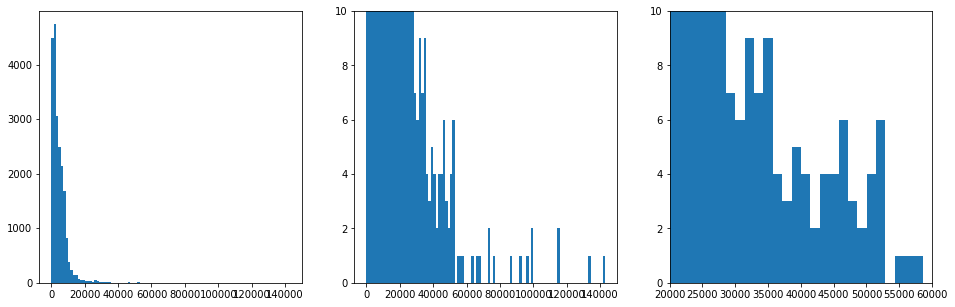

In [19]:
plt.figure(figsize=(16,5))
plt.subplot(1,3,1)
plt.hist(news_len,100)
plt.subplot(1,3,2)
plt.hist(news_len,100)
plt.ylim([0,10])
plt.subplot(1,3,3)
plt.hist(news_len,100)
plt.ylim([0,10])
plt.xlim([20000,60000])
plt.show()

In [20]:
print("We don't need to consider the instances where length of the news is more than 30000")

We don't need to consider the instances where length of the news is more than 30000


In [21]:
headline_len=[len(i) for i in df['headline']]

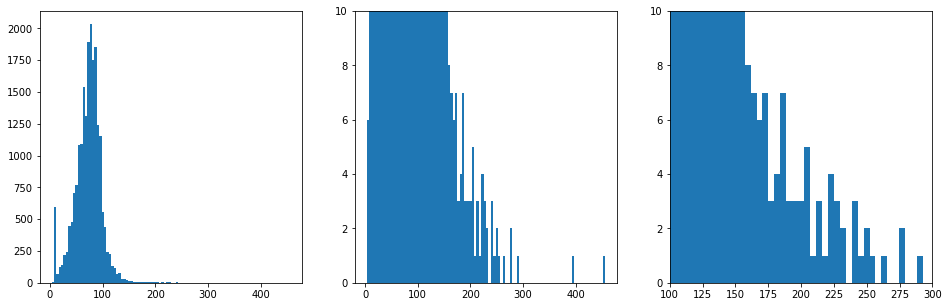

In [22]:
plt.figure(figsize=(16,5))
plt.subplot(1,3,1)
plt.hist(headline_len,100)
plt.subplot(1,3,2)
plt.hist(headline_len,100)
plt.ylim([0,10])
plt.subplot(1,3,3)
plt.hist(headline_len,100)
plt.ylim([0,10])
plt.xlim([100,300])
plt.show()

In [23]:
print("We don't need to consider the instances where length of the headline is more than 170")

We don't need to consider the instances where length of the headline is more than 170


In [24]:
df['news_len']=news_len
df['headline_len']=headline_len

In [25]:
df_filter=df[df['news_len']<30000].copy()
df_filtered=df_filter[df_filter['headline_len']<170].copy()
df_filtered.shape

(20643, 7)

In [26]:
print(len(df_filtered['label'][df_filtered['label']==1]),'instances have fake news with an avarage news length = ',np.mean(df_filtered['news_len'][df_filtered['label']==1] ),)
print(len(df_filtered['label'][df_filtered['label']==0]),'instances have real news with an avarage news length = ',np.mean(df_filtered['news_len'][df_filtered['label']==0] ),)

10302 instances have fake news with an avarage news length =  3609.681421083285
10341 instances have real news with an avarage news length =  5053.928246784643


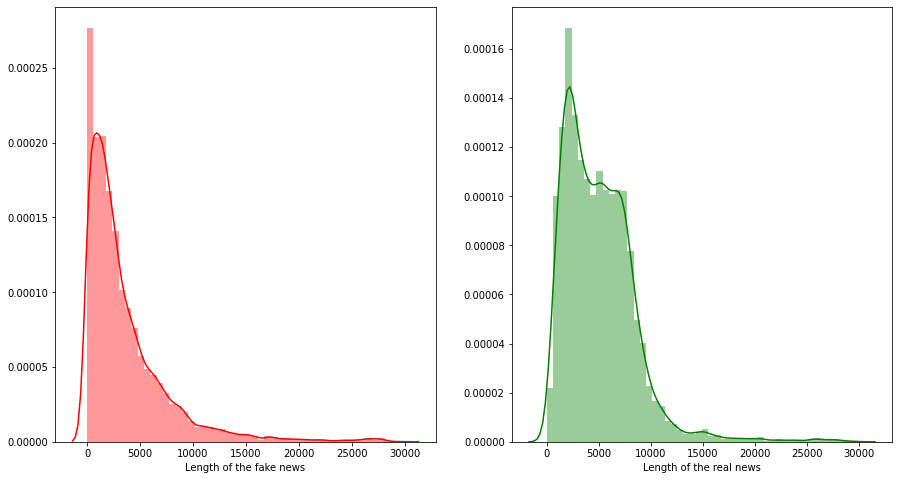

In [27]:
nu,li=plt.subplots(1,2,figsize = (15,8))
li[0]=sns.distplot(df_filtered['news_len'][df_filtered['label']==1],axlabel='Length of the fake news',ax=li[0],color='r')
li[1]=sns.distplot(df_filtered['news_len'][df_filtered['label']==0],axlabel='Length of the real news',ax=li[1],color='g')
plt.show()

In [28]:
print(len(df_filtered['label'][df_filtered['label']==1]),'instances have fake news with an avarage headline length = ',np.mean(df_filtered['headline_len'][df_filtered['label']==1] ),)
print(len(df_filtered['label'][df_filtered['label']==0]),'instances have real news with an avarage headline length = ',np.mean(df_filtered['headline_len'][df_filtered['label']==0] ),)

10302 instances have fake news with an avarage headline length =  64.67355853232382
10341 instances have real news with an avarage headline length =  79.62634174644619


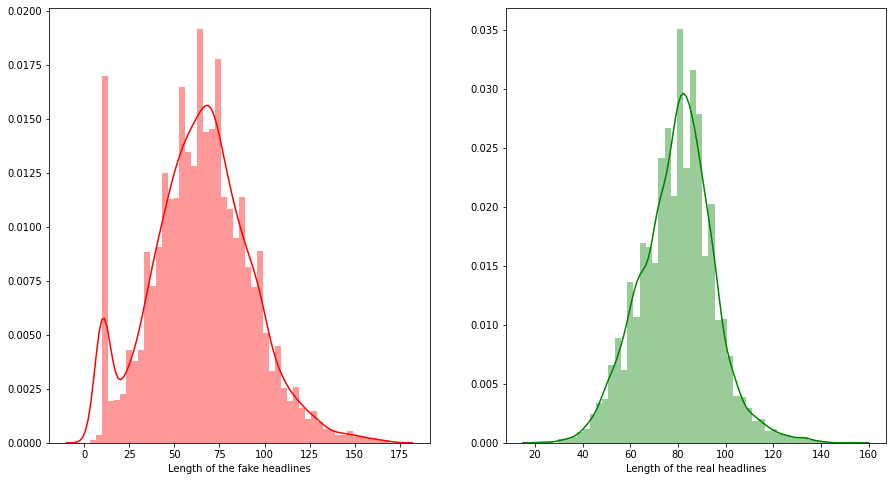

In [29]:
nu,li=plt.subplots(1,2,figsize = (15,8))
li[0]=sns.distplot(df_filtered['headline_len'][df_filtered['label']==1],axlabel='Length of the fake headlines',ax=li[0],color='r')
li[1]=sns.distplot(df_filtered['headline_len'][df_filtered['label']==0],axlabel='Length of the real headlines',ax=li[1],color='g')
plt.show()

In [30]:
df_filtered['h_to_n_ratio']=df_filtered['headline_len']/df_filtered['news_len']

In [31]:
print(len(df_filtered['label'][df_filtered['label']==1]),'instances have fake news with an avarage headline length to news length ratio = ',np.mean(df_filtered['h_to_n_ratio'][df_filtered['label']==1] ),)
print(len(df_filtered['label'][df_filtered['label']==0]),'instances have real news with an avarage headline length to news length ratio = ',np.mean(df_filtered['h_to_n_ratio'][df_filtered['label']==0] ),)

10302 instances have fake news with an avarage headline length to news length ratio =  0.6147366051803574
10341 instances have real news with an avarage headline length to news length ratio =  0.0319913267816161


In [32]:
from wordcloud import WordCloud

In [33]:
spams_news = df_filtered['news'][df_filtered['label']==1]
spams_headline=df_filtered['headline'][df_filtered['label']==1]

spam_cloud1 = WordCloud(width=1080,height=720,background_color='white',max_words=100).generate(' '.join(spams_news))
spam_cloud2 = WordCloud(width=1080,height=720,background_color='white',max_words=100).generate(' '.join(spams_headline))


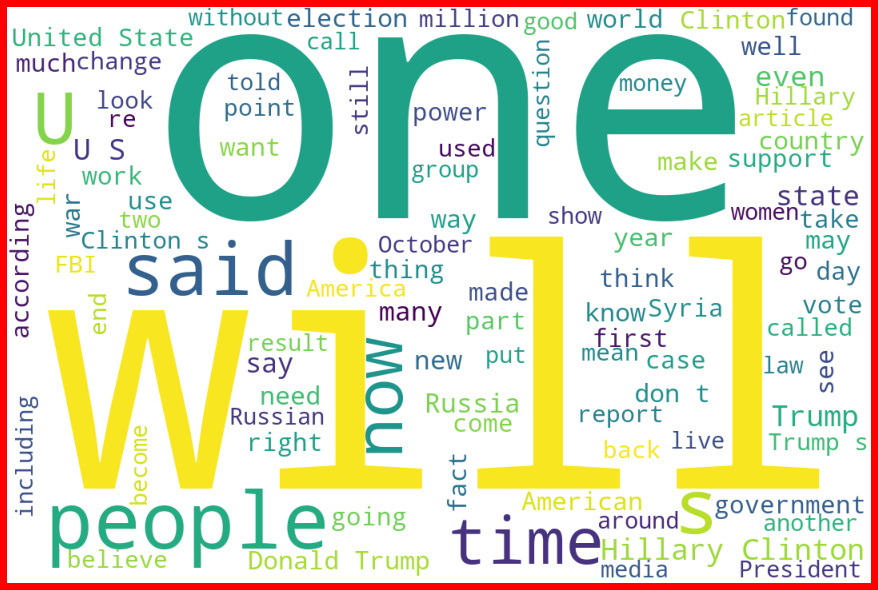

Word Cloud for fake news


In [34]:
plt.figure(figsize=(12,9),facecolor='r')
plt.imshow(spam_cloud1)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()
print('Word Cloud for fake news')

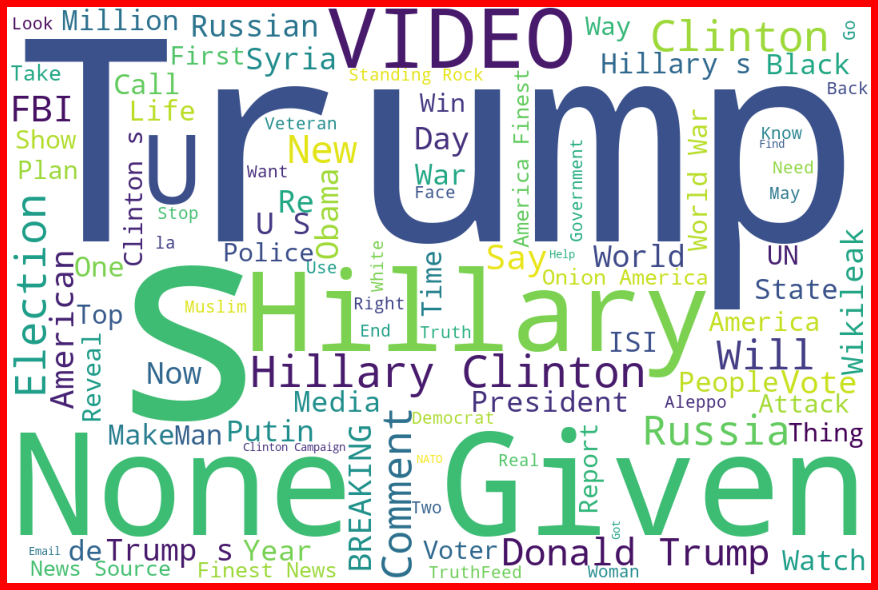

Word Cloud for fake headlines


In [35]:
plt.figure(figsize=(12,9),facecolor='r')
plt.imshow(spam_cloud2)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()
print('Word Cloud for fake headlines')

In [36]:
hams_news = df_filtered['news'][df_filtered['label']==0]
hams_headline=df_filtered['headline'][df_filtered['label']==0]

ham_cloud1 = WordCloud(width=1080,height=720,background_color='white',max_words=100).generate(' '.join(spams_news))
ham_cloud2 = WordCloud(width=1080,height=720,background_color='white',max_words=100).generate(' '.join(spams_headline))


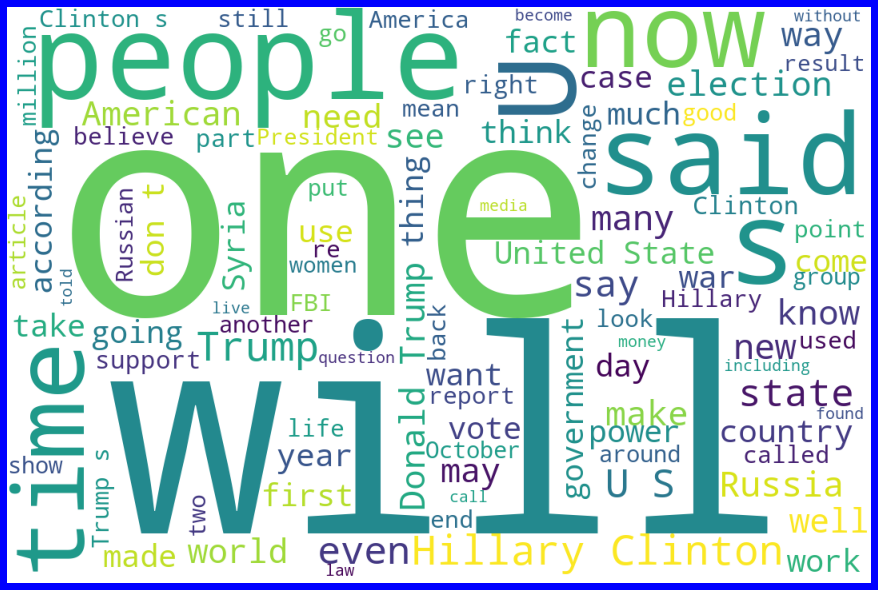

Word Cloud for real news


In [37]:
plt.figure(figsize=(12,9),facecolor='b')
plt.imshow(ham_cloud1)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()
print('Word Cloud for real news')

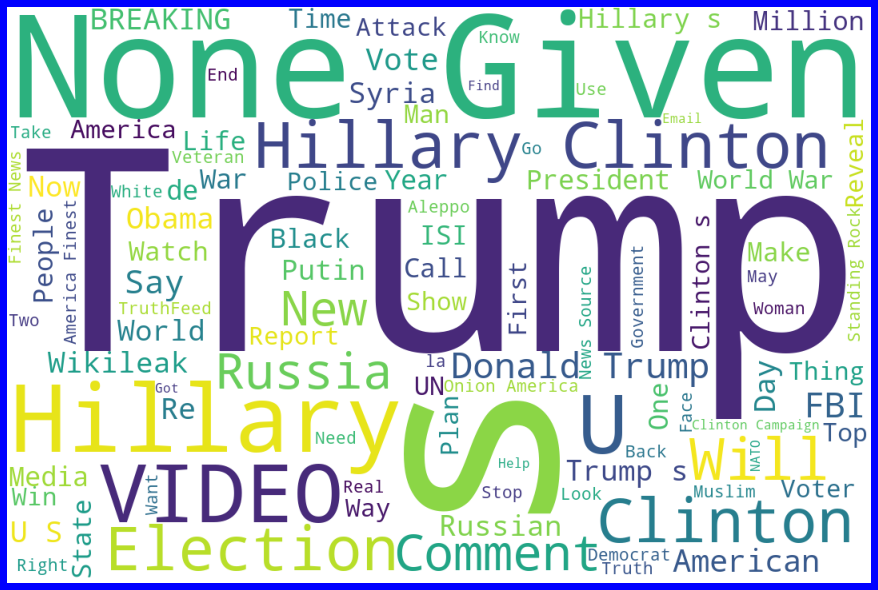

Word Cloud for real headlines


In [38]:
plt.figure(figsize=(12,9),facecolor='b')
plt.imshow(ham_cloud2)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()
print('Word Cloud for real headlines')

In [39]:
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
ps=PorterStemmer()
wordnet=WordNetLemmatizer()

In [40]:
corpus_news=[]
lu=set(stopwords.words('english'))
for i in df_filtered['news']:
    r=re.sub('[^a-zA-Z0-9]',' ',i)
    r=r.lower()
    r=r.split()
    r=[wordnet.lemmatize(k) for k in r if k not in lu]
    r=' '.join(r)
    corpus_news.append(r)

In [41]:
corpus_headline=[]
for i in df_filtered['headline']:
    r=re.sub('[^a-zA-Z0-9]',' ',i)
    r=r.lower()
    r=r.split()
    r=[wordnet.lemmatize(k) for k in r if k not in lu]
    r=' '.join(r)
    corpus_headline.append(r)

In [42]:
corpus_author=[]
for i in df_filtered['written_by']:
    r=re.sub('[^a-zA-Z0-9]',' ',i)
    r=r.lower()
    r=r.split()
    r=[wordnet.lemmatize(k) for k in r if k not in lu]
    r=' '.join(r)
    corpus_author.append(r)

In [43]:
from sklearn.feature_extraction.text import TfidfVectorizer
TfIdfV_n=TfidfVectorizer(max_features=700)
x_news=TfIdfV_n.fit_transform(corpus_news).toarray()

In [44]:
TfIdfV_h=TfidfVectorizer(max_features=200)
x_headlines=TfIdfV_h.fit_transform(corpus_headline).toarray()

In [45]:
TfIdfV_a=TfidfVectorizer(max_features=50)
x_author=TfIdfV_a.fit_transform(corpus_author).toarray()

In [46]:
df_filtered.columns

Index(['headline', 'written_by', 'news', 'label', 'isnull', 'news_len',
       'headline_len', 'h_to_n_ratio'],
      dtype='object')

In [47]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x_nan_part=ss.fit_transform(df_filtered[['news_len','headline_len', 'h_to_n_ratio']])

In [48]:
df_filtered[['news_len','headline_len', 'h_to_n_ratio']]

,news_len,headline_len,h_to_n_ratio
0,7936,84,0.010585
1,6112,72,0.011780
2,425,100,0.235294
3,6516,100,0.015347
4,9164,28,0.003055
...,...,...,...
20795,69,10,0.144928
20796,6621,43,0.006494
20797,3433,84,0.024468
20798,2334,55,0.023565


In [50]:
x_nan=df_filtered[['isnull','h_to_n_ratio']].to_numpy()

In [51]:
#x=np.concatenate((x_news,x_headlines,x_author,x_nan_part,x_nan[:,None]),axis=1)
x=np.concatenate((x_news,x_headlines,x_author),axis=1)

In [52]:
print(x_news.shape,x_headlines.shape,x_author.shape,x.shape)

(20643, 700) (20643, 200) (20643, 50) (20643, 950)


In [53]:
y=df_filtered['label']
y.shape

(20643,)

In [54]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.25)

In [55]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report,f1_score,log_loss

MNB=MultinomialNB()
DTC=DecisionTreeClassifier()
SVMR=SVC()
KNN=KNeighborsClassifier()
LR=LogisticRegression()
models=[MNB,DTC,SVMR,KNN,LR]


In [57]:
for model in models:
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    print('---'*15)
    print(model)
    print(confusion_matrix(y_test,y_pred))
    print(classification_report(y_test,y_pred))
    print(f1_score(y_test,y_pred))
    print(log_loss(y_test,y_pred))

---------------------------------------------
MultinomialNB()
[[2483   60]
 [ 247 2371]]
              precision    recall  f1-score   support

           0       0.91      0.98      0.94      2543
           1       0.98      0.91      0.94      2618

    accuracy                           0.94      5161
   macro avg       0.94      0.94      0.94      5161
weighted avg       0.94      0.94      0.94      5161

0.9391958803723509
2.054534456323076
---------------------------------------------
DecisionTreeClassifier()
[[2449   94]
 [  79 2539]]
              precision    recall  f1-score   support

           0       0.97      0.96      0.97      2543
           1       0.96      0.97      0.97      2618

    accuracy                           0.97      5161
   macro avg       0.97      0.97      0.97      5161
weighted avg       0.97      0.97      0.97      5161

0.9670538944962864
1.1577762988719222
---------------------------------------------
SVC()
[[2466   77]
 [  13 2605]]
     

In [58]:
from sklearn.model_selection import cross_val_score


In [59]:
sv=SVC()
scores=cross_val_score(sv,x,y,cv=5)

In [60]:
scores

array([0.98449988, 0.98546864, 0.98425769, 0.98425388, 0.98013566])